In [1]:
import os
import glob
import pandas as pd
import json 
import altair as alt
from datetime import datetime
from datetime import datetime, timedelta


In [2]:
ls "/data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/"

1947_09_14.tif  1992_09_18.tif
1967_09_21.tif  2013_09_13.tif
1970_09_09.tif  2015_09_01.tif
1970_09_29.tif  2019_10_11.tif
1974_08_10.tif  70_9_9.tif-log-dem_mosaic-06-10-1434-209332.txt
1977_09_27.tif  74_8_10.tif-log-dem_mosaic-06-10-1433-208777.txt
1979_10_06.tif  77_9_27.tif-log-dem_mosaic-06-10-1434-209447.txt
1987_08_21.tif  87_8_21.tif-log-dem_mosaic-06-10-1433-209156.txt
1990_09_05.tif  90_9_5.tif-log-dem_mosaic-06-10-1435-209675.txt
1991_09_09.tif  91_9_9.tif-log-dem_mosaic-06-10-1433-208865.txt
1992_09_15.tif  92_9_15.tif-log-dem_mosaic-06-10-1434-209257.txt


In [3]:
inputs_dir = "inputs/"
strip_time_format = "%Y_%m_%d"
default_data_type = 'SfM, NAGAP aerial'
data_types = {
    '1947_09_14': 'SfM, Earth Explorer aerial (low res)',
    '2013_09_13': 'SfM, EarthDEM Worldview satellite',
    '2015_09_01': 'Aerial LIDAR',
    '2019_10_11': 'SfM, EarthDEM Worldview satellite',
    
}

whole_mtn_data_manual = pd.DataFrame({
    'Date': ['1947_09_14', '1977_09_27', '1979_10_06', '2015_09_01'],
    'Larger Area': [True, True, True, True],
    'Valley': ['Whole Mountain', 'Whole Mountain', 'Whole Mountain', 'Whole Mountain']
})

dems_mosaic_path = "/data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/"

inputs_dict = {}
for input_file in os.listdir(inputs_dir):
    with open(os.path.join(inputs_dir, input_file), 'r') as j:
        input_file
        params = json.loads(j.read())
        inputs_dict[input_file.replace("_inputs.json", "")] = params

# Plot DEM Timelines

In [4]:
from pathlib import Path

In [5]:
# list all DEMs in dems_path
# remove the "TO_DROP" dates
# assign type
dem_data_df = pd.DataFrame()
for valley, params in inputs_dict.items():
    all_dem_dates = [Path(f).stem for f in 
        glob.glob(os.path.join(params['inputs']['dems_path'], "*.tif"))
    ]
    valid_dem_dates = [date for date in all_dem_dates if date not in params['inputs']['TO_DROP']]
    valid_dem_dates_largearea = [date for date in all_dem_dates if date not in params['inputs']['TO_DROP_LARGER_AREA']]
    df = pd.DataFrame()
    df['Date'] = valid_dem_dates
    df['Larger Area'] = df['Date'].apply(lambda date: date in valid_dem_dates_largearea)
    df['Valley'] = valley
    dem_data_df = dem_data_df.append(df)

dem_data_df = pd.concat([dem_data_df, whole_mtn_data_manual])

dem_data_df['Date'] = dem_data_df['Date'].apply(lambda d: datetime.strptime(d, strip_time_format))   
dem_data_df['Description'] = dem_data_df['Date'].apply(lambda d: data_types.get(datetime.strftime(d, strip_time_format), default_data_type))
dem_data_df['Graph Start Date'] = dem_data_df['Date'].apply(lambda d: d - timedelta(days=230))
dem_data_df['Graph End Date'] = dem_data_df['Date'].apply(lambda d: d + timedelta(days=90))
# dem_data_df['Graph Start Date'] = dem_data_df['Date'].apply(lambda d: d - timedelta(days=30))
# dem_data_df['Graph End Date'] = dem_data_df['Date'].apply(lambda d: d + timedelta(days=30))
dem_data_df['Valley'] = dem_data_df['Valley'].apply(lambda x: x.title())

/tmp/ipykernel_111260/2937571609.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem_data_df = dem_data_df.append(df)
/tmp/ipykernel_111260/2937571609.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem_data_df = dem_data_df.append(df)
/tmp/ipykernel_111260/2937571609.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem_data_df = dem_data_df.append(df)
/tmp/ipykernel_111260/2937571609.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem_data_df = dem_data_df.append(df)
/tmp/ipykernel_111260/2937571609.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [6]:
dem_data_df

Date  Larger Area          Valley  \
0 1970-09-29        False          Deming   
1 1979-10-06         True          Deming   
2 1991-09-09        False          Deming   
3 2015-09-01         True          Deming   
4 1947-09-14         True          Deming   
0 1970-09-29        False         Coleman   
1 1979-10-06         True         Coleman   
2 1987-08-21        False         Coleman   
3 1990-09-05        False         Coleman   
4 2015-09-01         True         Coleman   
5 1947-09-14         True         Coleman   
0 1970-09-29        False          Easton   
1 1977-09-27        False          Easton   
2 1979-10-06         True          Easton   
3 1991-09-09        False          Easton   
4 2015-09-01         True          Easton   
5 1947-09-14         True          Easton   
0 1970-09-29        False          Mazama   
1 1979-10-06         True          Mazama   
2 1992-09-18        False          Mazama   
3 2015-09-01         True          Mazama   
4 1947-09-14         True          Mazama   
0 1970-09-29        False         Rainbow   
1 1974-08-10        False         Rainbow   
2 1977-09-27         True         Rainbow   
3 1991-09-09        False         Rainbow   
4 2015-09-01         True         Rainbow   
5 1947-09-14         True         Rainbow   
0 1947-09-14         True  Whole Mountain   
1 1977-09-27         True  Whole Mountain   
2 1979-10-06         True  Whole Mountain   
3 2015-09-01         True  Whole Mountain   

                            Description Graph Start Date Graph End Date  
0                     SfM, NAGAP aerial       1970-02-11     1970-12-28  
1                     SfM, NAGAP aerial       1979-02-18     1980-01-04  
2                     SfM, NAGAP aerial       1991-01-22     1991-12-08  
3                          Aerial LIDAR       2015-01-14     2015-11-30  
4  SfM, Earth Explorer aerial (low res)       1947-01-27     1947-12-13  
0                     SfM, NAGAP aerial       1970-02-11     1970-12-28  
1                     SfM, NAGAP aerial       1979-02-18     1980-01-04  
2                     SfM, NAGAP aerial       1987-01-03     1987-11-19  
3                     SfM, NAGAP aerial       1990-01-18     1990-12-04  
4                          Aerial LIDAR       2015-01-14     2015-11-30  
5  SfM, Earth Explorer aerial (low res)       1947-01-27     1947-12-13  
0                     SfM, NAGAP aerial       1970-02-11     1970-12-28  
1                     SfM, NAGAP aerial       1977-02-09     1977-12-26  
2                     SfM, NAGAP aerial       1979-02-18     1980-01-04  
3                     SfM, NAGAP aerial       1991-01-22     1991-12-08  
4                          Aerial LIDAR       2015-01-14     2015-11-30  
5  SfM, Earth Explorer aerial (low res)       1947-01-27     1947-12-13  
0                     SfM, NAGAP aerial       1970-02-11     1970-12-28  
1                     SfM, NAGAP aerial       1979-02-18     1980-01-04  
2                     SfM, NAGAP aerial       1992-02-01     1992-12-17  
3                          Aerial LIDAR       2015-01-14     2015-11-30  
4  SfM, Earth Explorer aerial (low res)       1947-01-27     1947-12-13  
0                     SfM, NAGAP aerial       1970-02-11     1970-12-28  
1                     SfM, NAGAP aerial       1973-12-23     1974-11-08  
2                     SfM, NAGAP aerial       1977-02-09     1977-12-26  
3                     SfM, NAGAP aerial       1991-01-22     1991-12-08  
4                          Aerial LIDAR       2015-01-14     2015-11-30  
5  SfM, Earth Explorer aerial (low res)       1947-01-27     1947-12-13  
0  SfM, Earth Explorer aerial (low res)       1947-01-27     1947-12-13  
1                     SfM, NAGAP aerial       1977-02-09     1977-12-26  
2                     SfM, NAGAP aerial       1979-02-18     1980-01-04  
3                          Aerial LIDAR       2015-01-14     2015-11-30

In [7]:
alt.Chart(dem_data_df).mark_bar(
    opacity = 0.5
).encode(
    alt.X('Valley:N', axis=alt.Axis(labelAngle=0)),
    alt.Y('Graph Start Date:T'),
    alt.Y2('Graph End Date:T'),
    alt.Color('Description:N',
    legend=alt.Legend(
        orient='none',
        legendX=0, legendY=-40,
        direction='horizontal',
        titleAnchor='middle'
    )
    )
).properties(
    width=400,
    height=600

) + alt.Chart(dem_data_df).transform_filter(
    alt.FieldEqualPredicate(field='Larger Area', equal=True)
).mark_bar(
    color='black',
    filled=False
).encode(
    alt.X('Valley:N', axis=alt.Axis(labelAngle=0)),
    alt.Y('Graph Start Date:T'),
    alt.Y2('Graph End Date:T'),
    # alt.Color('Description:N')
).properties(
    width=400,
    height=600

)

alt.LayerChart(...)

In [8]:
src = dem_data_df.query("Valley != 'Easton'")
src = src[
    ~((src.Valley == 'Whole Mountain') & (src['Graph Start Date'].dt.year == 1977))
]

src = src[
    ~((src.Valley == 'Whole Mountain') & (src['Graph Start Date'].dt.year == 1979))
]
(
    alt.Chart(src).mark_bar(
        opacity = 0.5
    ).encode(
        alt.X('Valley:N', axis=alt.Axis(labelAngle=-20)),
        alt.Y('Graph Start Date:T'),
        alt.Y2('Graph End Date:T'),
        alt.Color('Description:N',
        legend=alt.Legend(
            orient='top',
            # legendX=0, legendY=-40,
            # direction='horizontal',
            titleAnchor='middle',
            columns=1,
            symbolLimit=0,
            labelLimit=0
        )
        )
    ).properties(
        width=400,
        height=600

    ) + alt.Chart(src).transform_filter(
        alt.FieldEqualPredicate(field='Larger Area', equal=True)
    ).mark_bar(
        color='black',
        filled=False
    ).encode(
        alt.X('Valley:N', axis=alt.Axis(labelAngle=-20)),
        alt.Y('Graph Start Date:T'),
        alt.Y2('Graph End Date:T'),
        # alt.Color('Description:N')
    ).properties(
        width=400,
        height=600
    )
).configure_legend(labelFontSize=18, titleFontSize=18).configure_axis(labelFontSize=18, titleFontSize=18)

alt.LayerChart(...)

In [9]:
src = dem_data_df.query("Valley != 'Easton'")
src = src[
    ~((src.Valley == 'Whole Mountain') & (src['Graph Start Date'].dt.year == 1977))
]

src = src[
    ~((src.Valley == 'Whole Mountain') & (src['Graph Start Date'].dt.year == 1979))
]

src['Graph End Date'] = src['Date'].apply(lambda d: d + timedelta(days=270))


In [10]:
src = src[['Valley',
'Graph Start Date',
'Graph End Date',
'Description']].rename(columns={'Valley':'Watershed'})
src['Watershed'] = src['Watershed'].apply(lambda x: '10 Watersheds' if x == 'Whole Mountain' else x)

In [11]:
alt.Chart(src).mark_bar(
    opacity = 0.5
).encode(
    alt.Y('Watershed:N', axis=alt.Axis(labelAngle=0), sort=['Whole Mountain']),
    alt.X('Graph Start Date:T', title='Year',),
    alt.X2('Graph End Date:T'),
    alt.Color('Description:N',
        legend=alt.Legend(
            title=None,
            orient='top',
            titleAnchor='middle',
            symbolLimit=0,
            labelLimit=0
        )
    )
).configure_legend(
    labelFontSize=18, 
    titleFontSize=18
).configure_axis(
    labelFontSize=18, 
    titleFontSize=18
).properties(
    width=800, 
    height=200
)

alt.Chart(...)

In [12]:
src = dem_data_df.query("Valley != 'Easton'")

src['Graph End Date'] = src['Graph End Date'].apply(lambda d: d + timedelta(days=90))


(alt.Chart(src).mark_bar(
    opacity = 0.5
).encode(
    alt.X('Valley:N', axis=alt.Axis(labelAngle=-20, tickCount=5)),
    alt.Y('Graph Start Date:T'),
    alt.Y2('Graph End Date:T'),
    alt.Color('Description:N',
    legend=alt.Legend(
        orient='top',
        # legendX=0, legendY=-40,
        # direction='horizontal',
        # titleAnchor='middle'
    )
    )
).properties(
    width=400,
    height=400

) + alt.Chart(src).transform_filter(
    alt.FieldEqualPredicate(field='Larger Area', equal=True)
).mark_bar(
    color='black',
    filled=False
).encode(
    alt.X('Valley:N', axis=alt.Axis(labelAngle=-20)),
    alt.Y('Graph Start Date:T', title='', axis=alt.Axis(tickCount=5)),
    alt.Y2('Graph End Date:T'),
    # alt.Color('Description:N')
).properties(
    width=400,
    height=400
)).configure_axis(labelFontSize=20, titleFontSize=20).configure_legend(labelFontSize=20, titleFontSize=20)

/tmp/ipykernel_111260/1226807257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  src['Graph End Date'] = src['Graph End Date'].apply(lambda d: d + timedelta(days=90))


alt.LayerChart(...)

# Plot DEM Gallery

In [13]:
import rioxarray as rix
from xrspatial import hillshade
import matplotlib.pyplot as plt

In [14]:
def create_dataset(individual_clouds_path):
    """
    Depends on files being organized as is the output of the TimesiftPipeline classs.
    individual_clouds_path (str): Path ending with "individual_clouds"
    tif_name (str): type of file to use. options include 'dem', 'dod', and 'orthomosaic'
    """
    all_files = glob.glob(os.path.join(individual_clouds_path, "*.tif"), recursive=True)
    d = {}
    for f in all_files:
        tif_name = os.path.split(f)[-1].replace(".tif", "")
        print(f'Reading {f}')
        d[tif_name] = rix.open_rasterio(
            f, 
            masked=True
        )
        d[tif_name] = d[tif_name].rio.reproject(resolution=(30,30), dst_crs = d[tif_name].rio.crs)
    return d


In [15]:
dem_lowres_dataset = create_dataset(dems_mosaic_path)

Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/2013_09_13.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/2019_10_11.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/2015_09_01.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/1974_08_10.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/1970_09_29.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/1979_10_06.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/1991_09_09.tif
Reading /data2/elilouis/timesift/baker-ee-many/mixed_timesift/individual_clouds/final_products/dems_mosaiced/1992_09_18.tif
Reading 

## Plot all DEM mosaics

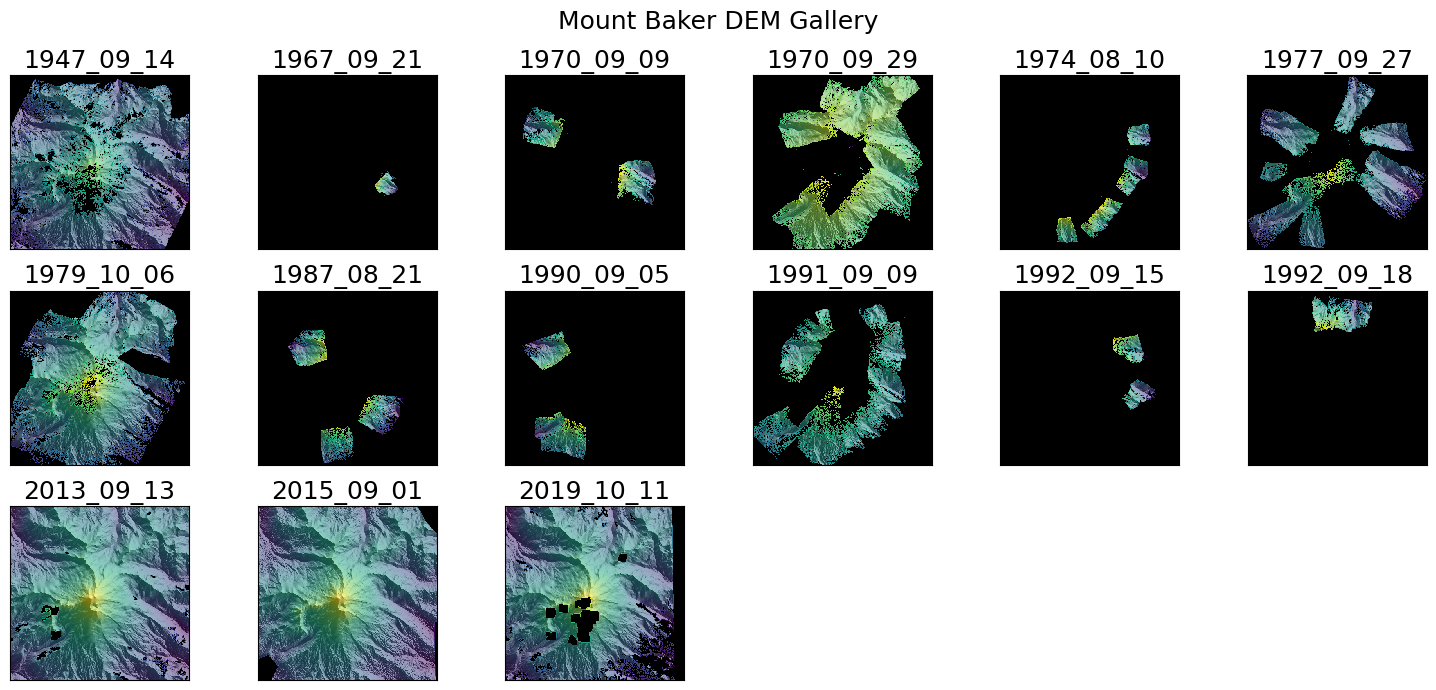

In [16]:
bounds = dem_lowres_dataset['1977_09_27'].rio.bounds()

rows = 3
columns = 6

fig = plt.figure(figsize=(15,7))


items = list((dem_lowres_dataset.items()))
items.sort(key=lambda x: x[0])

for i, (key, raster) in enumerate(items):
    raster_clipped = raster.rio.clip_box(*bounds)
    raster_clipped = raster_clipped.rio.pad_box(*bounds)
    
    ax = plt.subplot(rows, columns, i + 1, aspect='auto')
    ax.imshow(raster_clipped.squeeze(), interpolation='none')
    ax.imshow(hillshade(raster_clipped.squeeze()), interpolation='none', cmap='gray_r', alpha=0.5)
    
    # ax.set_xlim(bounds[0],bounds[2])
    # ax.set_ylim(bounds[1],bounds[3])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(key.replace('.0',''),size=18)
    ax.set_facecolor('black')

fig.suptitle('Mount Baker DEM Gallery', fontsize=18)
fig.set_facecolor("w")
plt.tight_layout()
plt.savefig('dem_gallery_filtered_dems_by_date.png')
plt.show()


In [17]:
import numpy as np


283.965
3265.0813


<Figure size 1000x2400 with 0 Axes>

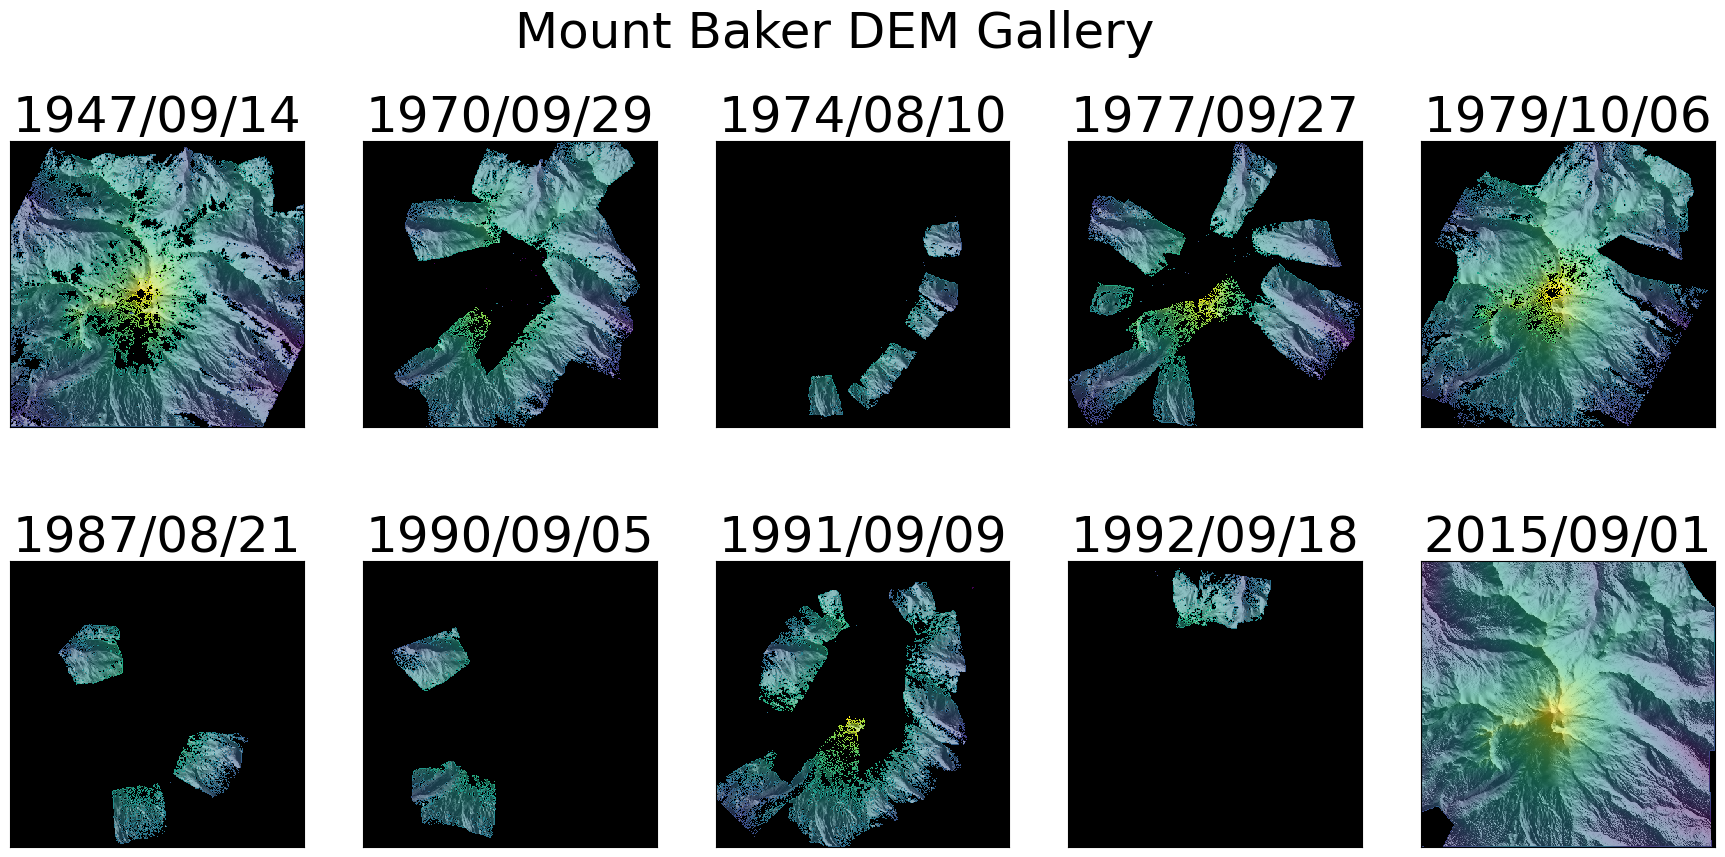

In [18]:
vmin = np.nanmin(dem_lowres_dataset['2015_09_01'].values)
vmax = np.nanmax(dem_lowres_dataset['2015_09_01'].values)
print(vmin)
print(vmax)
bounds = dem_lowres_dataset['1977_09_27'].rio.bounds()

rows = 2
columns = 5

fig = plt.figure(figsize=(10, 24))


items = list((dem_lowres_dataset.items()))
items.sort(key=lambda x: x[0])

#row col
locations = [
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [0, 2],
    [1, 2],
    [0, 3],
    [1, 3],
    [0, 4],
    [1, 4],
]

locations = [
    [0, 0],
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [1, 0],
    [1, 1],
    [1, 2],
    [1, 3],
    [1, 4],

]



used_dates = dem_data_df['Date'].apply(lambda x: x.strftime(strip_time_format))
items = [i for i in items if i[0] in list(used_dates)]



###### NEW ###### 
fig, axes = plt.subplots(rows, columns, figsize=(22, 10))
###### NEW ###### 


for i, (key, raster) in enumerate(items):
    raster_clipped = raster.rio.clip_box(*bounds)
    raster_clipped = raster_clipped.rio.pad_box(*bounds)

    ###### NEW ###### 
    ax = axes[
        locations[i][0], locations[i][1]
    ]
    ###### NEW ###### 
    
    ###### OLD ###### 
    # ax = plt.subplot(rows, columns, i + 1, aspect='auto')

    
    ax.imshow(raster_clipped.squeeze(), interpolation='none', vmin=vmin, vmax=vmax)
    ax.imshow(hillshade(raster_clipped.squeeze()), interpolation='none', cmap='gray_r', alpha=0.5)
    
    # ax.set_xlim(bounds[0],bounds[2])
    # ax.set_ylim(bounds[1],bounds[3])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(key.replace('.0','').replace('_', '/'),size=36)
    ax.set_facecolor('black')

fig.suptitle('Mount Baker DEM Gallery', fontsize=36)
fig.set_facecolor("w")
# plt.tight_layout()
plt.savefig('dem_gallery_filtered_dems_by_date.png')
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
axes

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

283.965
3265.0813


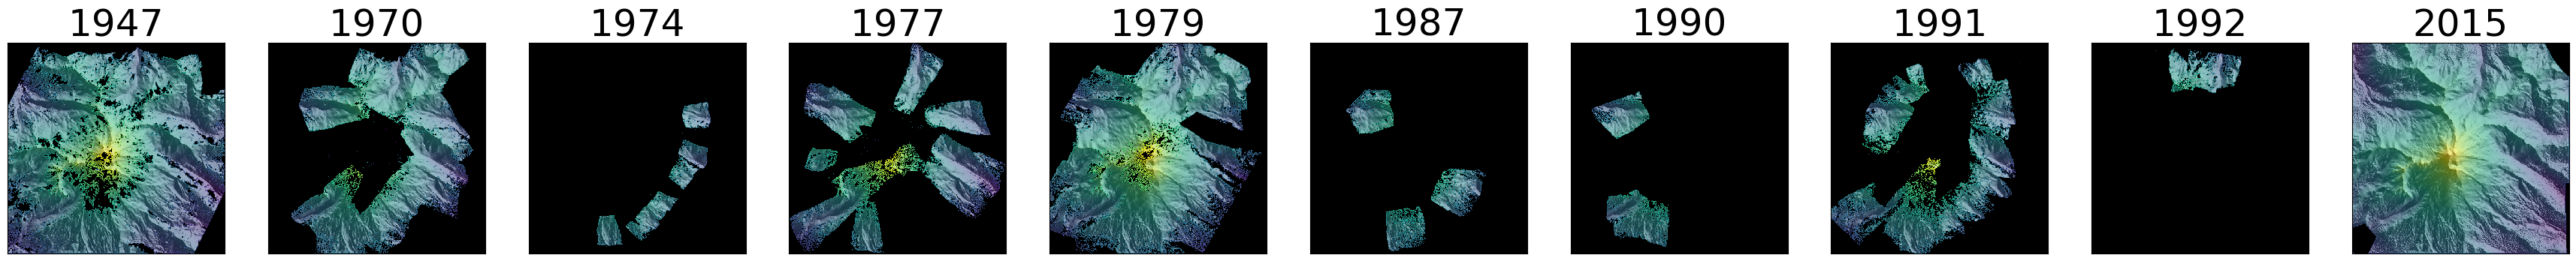

In [27]:
vmin = np.nanmin(dem_lowres_dataset['2015_09_01'].values)
vmax = np.nanmax(dem_lowres_dataset['2015_09_01'].values)
print(vmin)
print(vmax)
bounds = dem_lowres_dataset['1977_09_27'].rio.bounds()

rows = 1
columns = 10



items = list((dem_lowres_dataset.items()))
items.sort(key=lambda x: x[0])


locations = list(range(0,10))



used_dates = dem_data_df['Date'].apply(lambda x: x.strftime(strip_time_format))
items = [i for i in items if i[0] in list(used_dates)]



###### NEW ###### 
fig, axes = plt.subplots(rows, columns, figsize=(44, 5))
###### NEW ###### 


for i, (key, raster) in enumerate(items):
    raster_clipped = raster.rio.clip_box(*bounds)
    raster_clipped = raster_clipped.rio.pad_box(*bounds)

    ###### NEW ###### 
    ax = axes[
        i
    ]
    ###### NEW ###### 
    
    ###### OLD ###### 
    # ax = plt.subplot(rows, columns, i + 1, aspect='auto')

    
    ax.imshow(raster_clipped.squeeze(), interpolation='none', vmin=vmin, vmax=vmax)
    ax.imshow(hillshade(raster_clipped.squeeze()), interpolation='none', cmap='gray_r', alpha=0.5)
    
    # ax.set_xlim(bounds[0],bounds[2])
    # ax.set_ylim(bounds[1],bounds[3])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(key.replace('.0','').replace('_', '/').split('/')[0],size=36)
    ax.set_facecolor('black')

# fig.suptitle('Mount Baker DEM Gallery', fontsize=36)
fig.set_facecolor("w")
# plt.tight_layout()
plt.savefig('dem_gallery_filtered_dems_by_date.png')
plt.show()


283.965
3265.0813


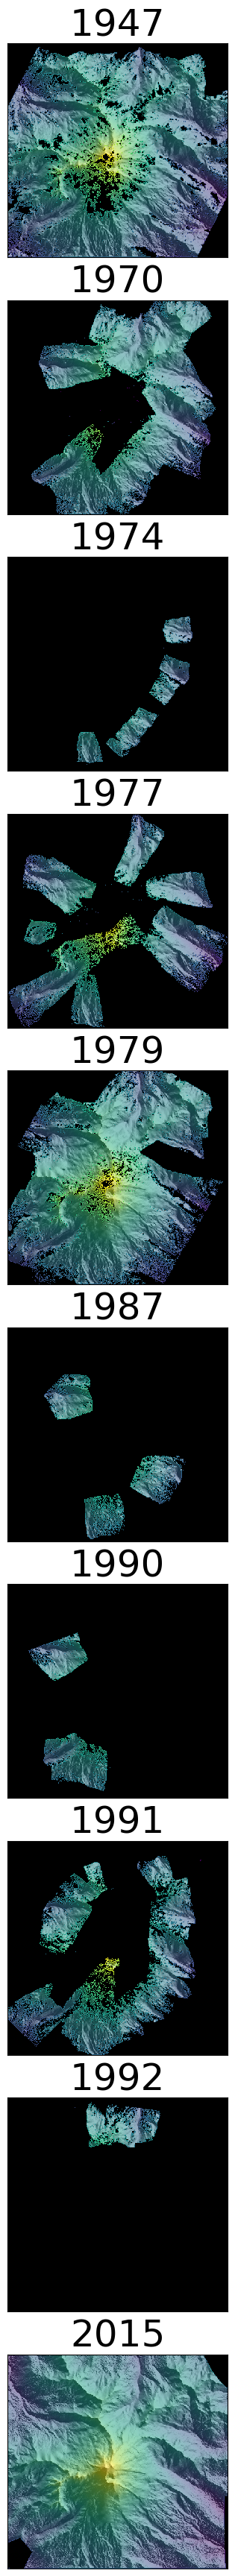

In [28]:
vmin = np.nanmin(dem_lowres_dataset['2015_09_01'].values)
vmax = np.nanmax(dem_lowres_dataset['2015_09_01'].values)
print(vmin)
print(vmax)
bounds = dem_lowres_dataset['1977_09_27'].rio.bounds()

rows = 10
columns = 1



items = list((dem_lowres_dataset.items()))
items.sort(key=lambda x: x[0])


locations = list(range(0,10))



used_dates = dem_data_df['Date'].apply(lambda x: x.strftime(strip_time_format))
items = [i for i in items if i[0] in list(used_dates)]



###### NEW ###### 
fig, axes = plt.subplots(rows, columns, figsize=(5, 44))
###### NEW ###### 


for i, (key, raster) in enumerate(items):
    raster_clipped = raster.rio.clip_box(*bounds)
    raster_clipped = raster_clipped.rio.pad_box(*bounds)

    ###### NEW ###### 
    ax = axes[
        i
    ]
    ###### NEW ###### 
    
    ###### OLD ###### 
    # ax = plt.subplot(rows, columns, i + 1, aspect='auto')

    
    ax.imshow(raster_clipped.squeeze(), interpolation='none', vmin=vmin, vmax=vmax)
    ax.imshow(hillshade(raster_clipped.squeeze()), interpolation='none', cmap='gray_r', alpha=0.5)
    
    # ax.set_xlim(bounds[0],bounds[2])
    # ax.set_ylim(bounds[1],bounds[3])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(key.replace('.0','').replace('_', '/').split('/')[0],size=36)
    ax.set_facecolor('black')

# fig.suptitle('Mount Baker DEM Gallery', fontsize=36)
fig.set_facecolor("w")
# plt.tight_layout()
plt.savefig('dem_gallery_filtered_dems_by_date.png')
plt.show()
